In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
df = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500sub.csv", index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [3]:
# Google
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [4]:
def log_ret(price):
    log_price = np.log(price)
    return log_price.diff() # --> log return

In [5]:
goog['LogRet'] = log_ret(goog['Close'])

In [6]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


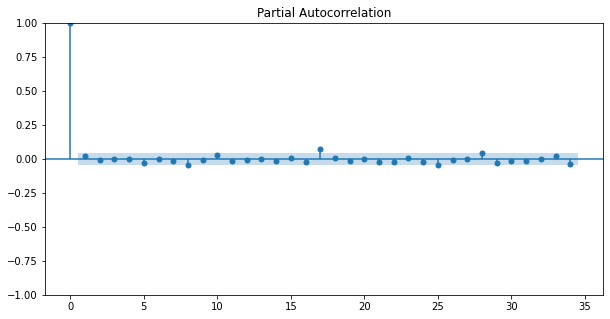

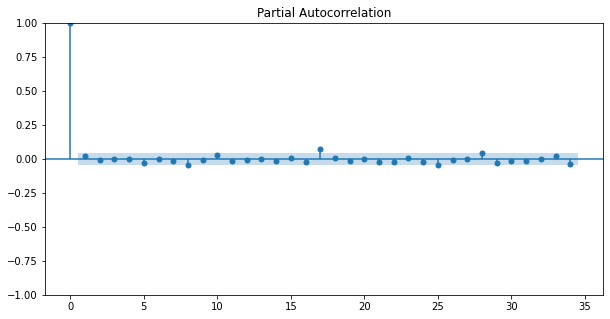

In [7]:
# pacf

fi, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog['LogRet'].dropna(), ax=ax)

# no autocorellation for any order p greater than 0 --> choose p = 0

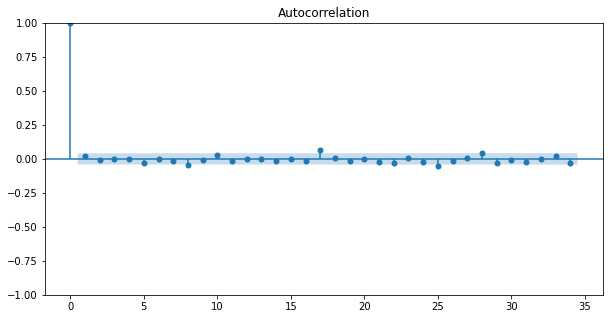

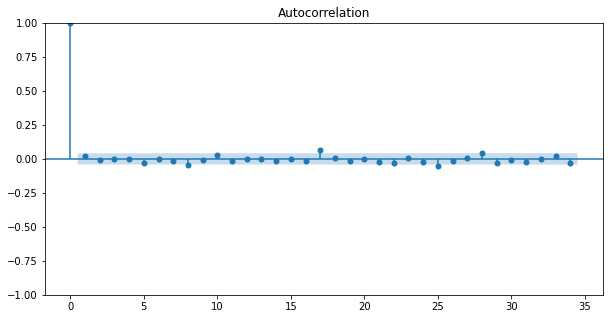

In [8]:
# acf

fi, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog['LogRet'].dropna(), ax=ax)

# looks pretty much the same --> same choice 

In [9]:
# Apple
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()

In [10]:
aapl['LogRet'] = log_ret(aapl['Close'])

In [11]:
aapl.head()

,Close,LogRet
Date,,
2010-01-04,30.572857,NaN
2010-01-05,30.625713,0.001727
2010-01-06,30.138571,-0.016034
2010-01-07,30.082857,-0.001850
2010-01-08,30.282858,0.006626


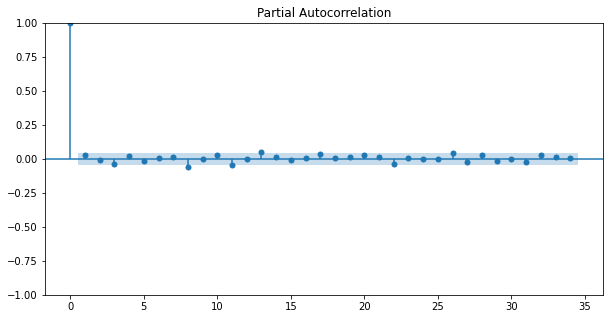

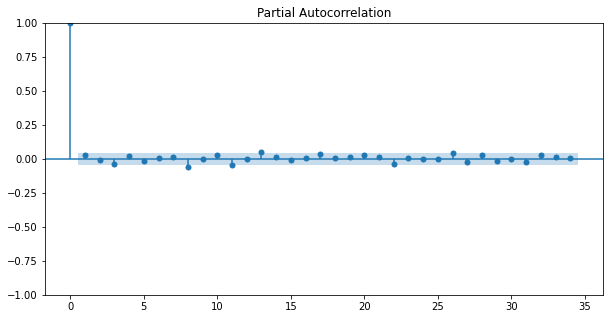

In [12]:
# pacf

fi, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl['LogRet'].dropna(), ax=ax)

# same again, no significant pacf value --> p = 0

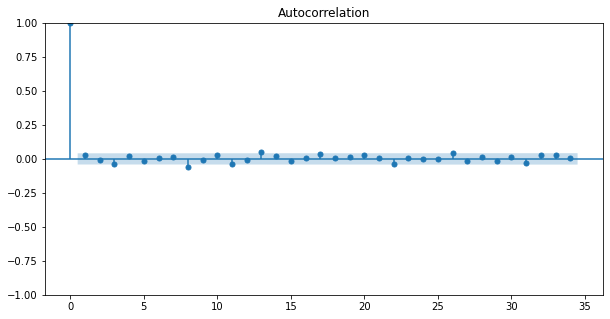

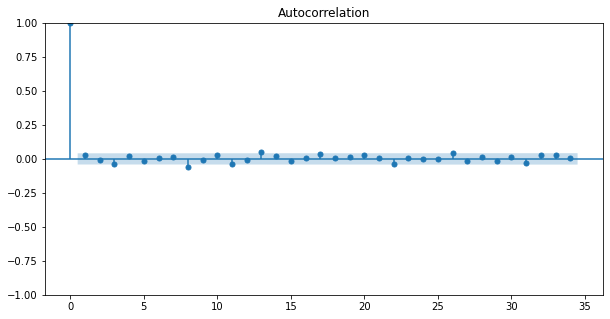

In [13]:
# acf

fi, ax = plt.subplots(figsize=(10, 5))
plot_acf(aapl['LogRet'].dropna(), ax=ax)

# looks pretty much the same --> same choice 
# apple stock price follows a random walk

In [14]:
# IBM
ibm = df[df['Name'] == 'IBM'][['Close']].copy()
ibm['LogRet'] = log_ret(ibm['Close'])
ibm.head()

,Close,LogRet
Date,,
2010-01-04,132.449997,NaN
2010-01-05,130.850006,-0.012154
2010-01-06,130.000000,-0.006517
2010-01-07,129.550003,-0.003468
2010-01-08,130.850006,0.009985


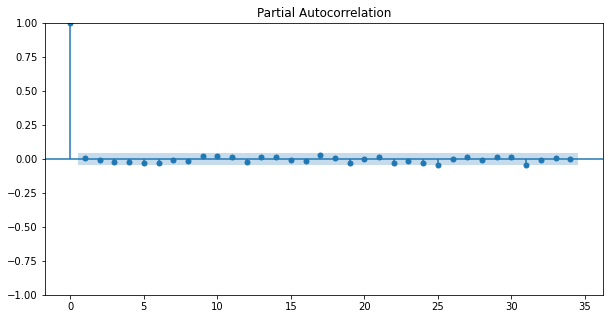

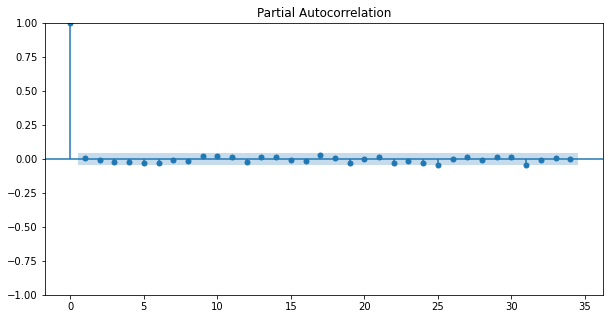

In [15]:
# pacf

fi, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ibm['LogRet'].dropna(), ax=ax)



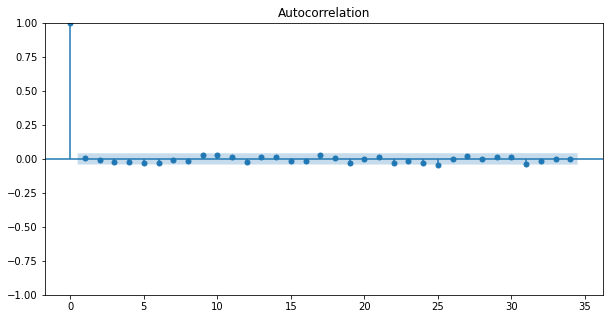

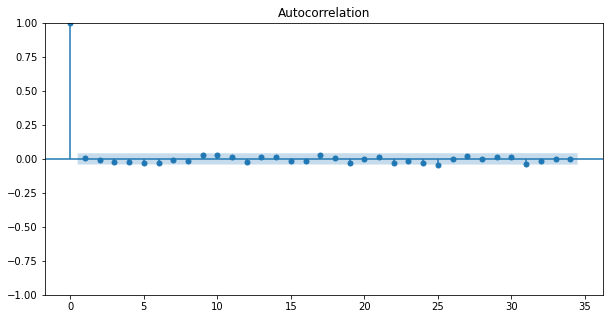

In [16]:
# acf

fi, ax = plt.subplots(figsize=(10, 5))
plot_acf(ibm['LogRet'].dropna(), ax=ax)

# q = 0

In [17]:
# Starbucks
sbux = df[df['Name'] == 'SBUX'][['Close']].copy()
sbux['LogRet'] = log_ret(ibm['Close'])
sbux.head()

,Close,LogRet
Date,,
2010-01-04,11.525,NaN
2010-01-05,11.795,-0.012154
2010-01-06,11.710,-0.006517
2010-01-07,11.680,-0.003468
2010-01-08,11.640,0.009985


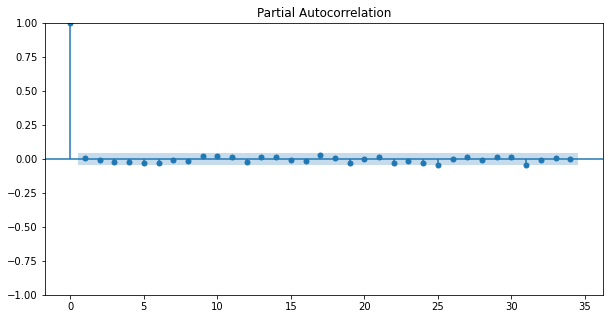

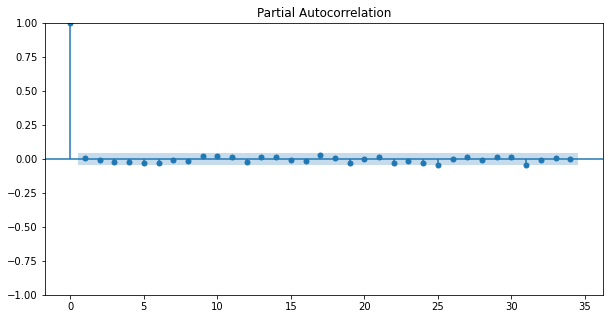

In [20]:
# pacf

fi, ax = plt.subplots(figsize=(10, 5))
plot_pacf(sbux['LogRet'].dropna(), ax=ax)

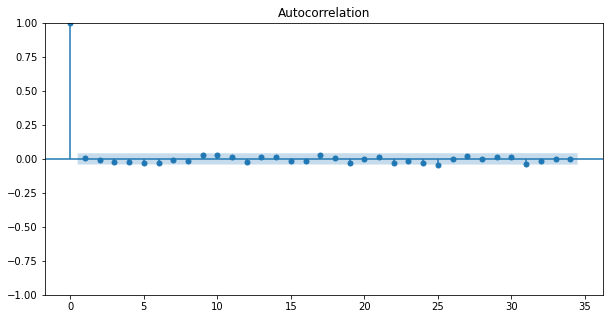

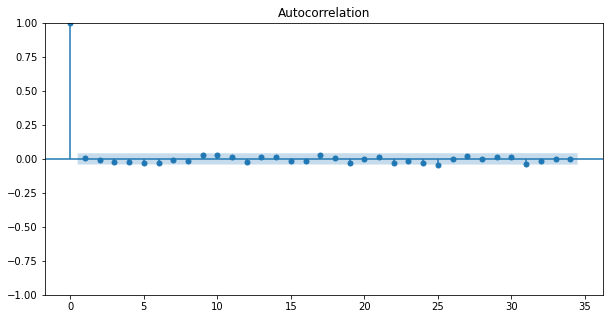

In [21]:
# acf

fi, ax = plt.subplots(figsize=(10, 5))
plot_acf(sbux['LogRet'].dropna(), ax=ax)

# q = 0
# random walk again --> arima(0,1,0)